Optimum Tork: 200.00 Nm, Optimum Tekerlek Çapı: 0.50 metre


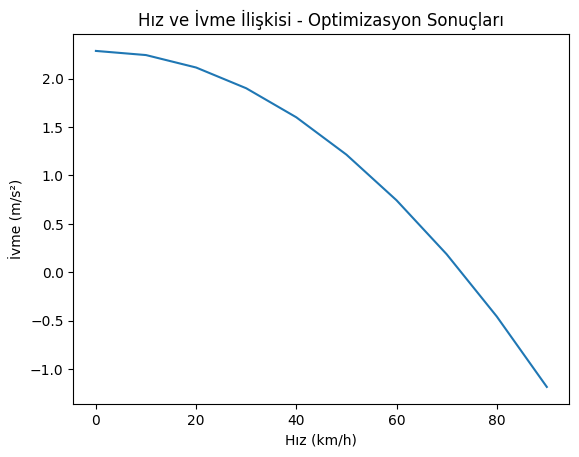

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Araç verileri
veriler = pd.DataFrame({
    'Kütle': [350],  # kg
    'Tekerlek_Çapı': [0.5],  # metre
    'Motor_Gücü': [20],  # kW
    'Tork': [200],  # Nm
    'Aerodinamik_Sürtünme': [0.3],  # Cd
    'Batarya_Kapasitesi': [5.5],  # kWh
    'Hava_Direnci': [1.2]  # Kg/m^3
})

kütle = veriler['Kütle'][0]
tekerlek_çapı = veriler['Tekerlek_Çapı'][0]
motor_gücü = veriler['Motor_Gücü'][0]
tork = veriler['Tork'][0]
aerodinamik_sürtünme = veriler['Aerodinamik_Sürtünme'][0]
hava_direnci = veriler['Hava_Direnci'][0]

def hesapla_ivme(tork, kütle, tekerlek_çapı):
    kuvvet = tork / (tekerlek_çapı / 2)  # Kuvvet (F = Tork / Yarıçap)
    ivme = kuvvet / kütle  # İvme (F = ma)
    return ivme

def simule_ivme(motor_gucu, kütle, tork, tekerlek_çapı, aerodinamik_sürtünme, hız):
    kuvvet = tork / (tekerlek_çapı / 2)
    hava_direnci = 0.5 * aerodinamik_sürtünme * hız**2
    net_kuvvet = kuvvet - hava_direnci
    ivme = net_kuvvet / kütle
    return ivme

def maliyet_fonksiyonu(params):
    tork, tekerlek_çapı = params
    ivme = hesapla_ivme(tork, kütle, tekerlek_çapı)
    enerji_tüketimi = tork * 0.001  # Basit enerji tüketim modeli
    return -ivme + enerji_tüketimi  # İvmeyi maksimize ederken enerji tüketimini minimize et

başlangıç_değerleri = [200, 0.5]  # Başlangıç değerleri: tork, tekerlek çapı
sonuç = minimize(maliyet_fonksiyonu, başlangıç_değerleri, method='BFGS')

# Optimum tork ve tekerlek çapı sonuçları
opt_tork, opt_tekerlek_çapı = sonuç.x
print(f"Optimum Tork: {opt_tork:.2f} Nm, Optimum Tekerlek Çapı: {opt_tekerlek_çapı:.2f} metre")

hızlar = np.arange(0, 100, 10)
ivmeler = [simule_ivme(motor_gücü, kütle, opt_tork, opt_tekerlek_çapı, aerodinamik_sürtünme, hız) for hız in hızlar]

plt.plot(hızlar, ivmeler)
plt.xlabel('Hız (km/h)')
plt.ylabel('İvme (m/s²)')
plt.title('Hız ve İvme İlişkisi - Optimizasyon Sonuçları')
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, differential_evolution

# Araç verileri - Shell Eco-marathon kurallarına göre
veriler = pd.DataFrame({
    'Kütle': [140],  # Araç ağırlığı (kg) - sürücü hariç
    'Tekerlek_Çapı': [0.5],  # metre
    'Motor_Gücü': [20],  # kW
    'Tork': [200],  # Nm
    'Aerodinamik_Sürtünme': [0.3],  # Cd
    'Batarya_Kapasitesi': [5.5],  # kWh
    'Hava_Direnci': [1.2],  # kg/m^3
    'Frontal_Alan': [1.6],  # metre kare
    'Lastik_Yuvarlanma_Direnci': [0.015]  # Yuvarlanma katsayısı
})

# Parametreleri değişkenlere atayalım
kütle = veriler['Kütle'][0]
tekerlek_çapı = veriler['Tekerlek_Çapı'][0]
motor_gücü = veriler['Motor_Gücü'][0]
tork = veriler['Tork'][0]
aerodinamik_sürtünme = veriler['Aerodinamik_Sürtünme'][0]
hava_direnci = veriler['Hava_Direnci'][0]
frontal_alan = veriler['Frontal_Alan'][0]
yuvarlanma_direnci = veriler['Lastik_Yuvarlanma_Direnci'][0]

def hesapla_ivme(tork, kütle, tekerlek_çapı):
    kuvvet = tork / (tekerlek_çapı / 2)  # Kuvvet (F = Tork / Yarıçap)
    ivme = kuvvet / kütle  # İvme (F = ma)
    return ivme

def simule_ivme(motor_gucu, kütle, tork, tekerlek_çapı, aerodinamik_sürtünme, hız, frontal_alan, lastik_yuvarlanma):
    kuvvet = tork / (tekerlek_çapı / 2)
    hava_direnci = 0.5 * aerodinamik_sürtünme * frontal_alan * hız**2
    yuvarlanma_direnci = kütle * 9.81 * lastik_yuvarlanma
    net_kuvvet = kuvvet - (hava_direnci + yuvarlanma_direnci)
    ivme = net_kuvvet / kütle
    return ivme

def maliyet_fonksiyonu(params):
    tork, tekerlek_çapı = params
    ivme = hesapla_ivme(tork, kütle, tekerlek_çapı)
    enerji_tüketimi = tork * 0.001  # Basit enerji tüketim modeli
    return -ivme + enerji_tüketimi  # İvmeyi maksimize ederken enerji tüketimini minimize et

sınırlar = [(150, 300), (0.3, 0.7)]  # Tork ve tekerlek çapı sınırları
sonuç = differential_evolution(maliyet_fonksiyonu, sınırlar)

# Optimum tork ve tekerlek çapı sonuçları
opt_tork, opt_tekerlek_çapı = sonuç.x
print(f"Optimum Tork: {opt_tork:.2f} Nm, Optimum Tekerlek Çapı: {opt_tekerlek_çapı:.2f} metre")


Optimum Tork: 300.00 Nm, Optimum Tekerlek Çapı: 0.30 metre


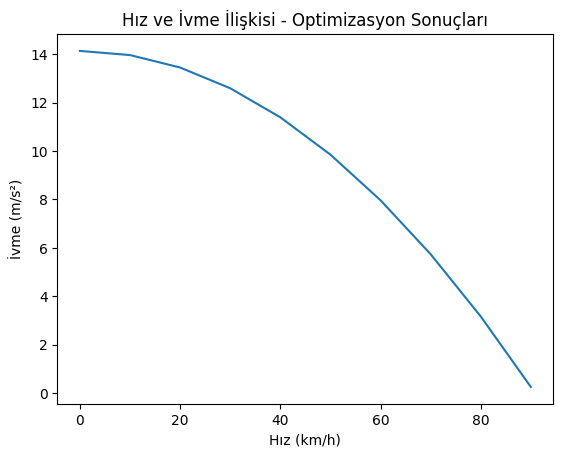

In [3]:
def enerji_tüketimi(ivme, motor_gucu, batarya_kapasitesi):
    enerji_tüketimi = motor_gucu * ivme * 0.9  # %90 verimlilik varsayımı
    menzil = (batarya_kapasitesi * 1000) / enerji_tüketimi  # km cinsinden menzil
    return enerji_tüketimi, menzil

hızlar = np.arange(0, 100, 10)
ivmeler = [simule_ivme(motor_gücü, kütle, opt_tork, opt_tekerlek_çapı, aerodinamik_sürtünme, hız, frontal_alan, yuvarlanma_direnci) for hız in hızlar]

plt.plot(hızlar, ivmeler)
plt.xlabel('Hız (km/h)')
plt.ylabel('İvme (m/s²)')
plt.title('Hız ve İvme İlişkisi - Optimizasyon Sonuçları')
plt.show()


In [4]:
def monte_carlo_simülasyonu(n):
    sonuçlar = []
    for i in range(n):
        tork = np.random.uniform(150, 300)  # Torkta rastgelelik
        tekerlek_çapı = np.random.uniform(0.3, 0.7)  # Tekerlek çapı rastgelelik
        ivme = hesapla_ivme(tork, kütle, tekerlek_çapı)
        sonuçlar.append(ivme)
    return np.mean(sonuçlar), np.std(sonuçlar)

ort_ivme, ivme_standart_sapma = monte_carlo_simülasyonu(1000)
print(f"Ortalama İvme: {ort_ivme}, Standart Sapma: {ivme_standart_sapma}")

Ortalama İvme: 6.776927633057957, Standart Sapma: 2.087827538698022


Optimum Tork: 150.00 Nm, Optimum Tekerlek Çapı: 0.70 metre, Optimum Hız: 100.00 km/h
Ortalama İvme: -0.76, Standart Sapma: 5.84
Sensitivite Değerleri: [0.00960861 0.05206663 0.93566701]


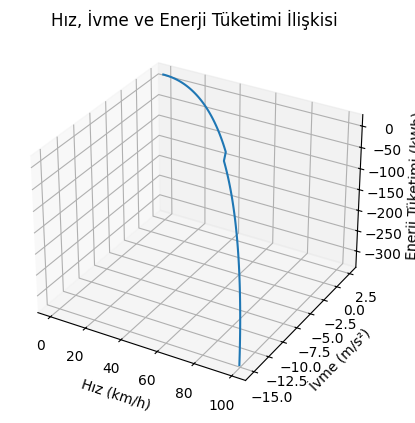

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution
from SALib.sample import sobol
from SALib.analyze import sobol as sobol_analyze
from mpl_toolkits.mplot3d import Axes3D

# 1. Araç Parametrelerinin Tanımlanması
veriler = pd.DataFrame({
    'Kütle': [140],  # kg - sürücü hariç
    'Tekerlek_Çapı': [0.5],  # metre
    'Motor_Gücü': [20],  # kW
    'Tork': [200],  # Nm
    'Aerodinamik_Sürtünme': [0.3],  # Cd
    'Batarya_Kapasitesi': [5.5],  # kWh
    'Hava_Direnci': [1.2],  # kg/m^3
    'Frontal_Alan': [1.6],  # m²
    'Lastik_Yuvarlanma_Direnci': [0.015]  # Yuvarlanma katsayısı
})

# Parametre atamaları
kütle = veriler['Kütle'][0]
tekerlek_çapı = veriler['Tekerlek_Çapı'][0]
motor_gücü = veriler['Motor_Gücü'][0]
tork = veriler['Tork'][0]
aerodinamik_sürtünme = veriler['Aerodinamik_Sürtünme'][0]
hava_direnci = veriler['Hava_Direnci'][0]
frontal_alan = veriler['Frontal_Alan'][0]
yuvarlanma_direnci = veriler['Lastik_Yuvarlanma_Direnci'][0]

# 2. Motor Verimliliği Modeli ve İvme Hesaplaması
def motor_verimliliği(hız):
    # Basit verimlilik modeli
    return 0.85 if hız < 50 else 0.7

def hesapla_ivme_gelişmiş(tork, hız, kütle, tekerlek_çapı, aerodinamik_sürtünme, lastik_yuvarlanma, frontal_alan):
    verimli_tork = tork * motor_verimliliği(hız)
    kuvvet = verimli_tork / (tekerlek_çapı / 2)
    hava_direnci = 0.5 * aerodinamik_sürtünme * frontal_alan * hız**2
    yuvarlanma_direnci = kütle * 9.81 * lastik_yuvarlanma
    net_kuvvet = kuvvet - (hava_direnci + yuvarlanma_direnci)
    ivme = net_kuvvet / kütle
    return ivme

# 3. Enerji Yönetimi ve Rejeneratif Frenleme
def enerji_yonetimi(ivme, frenleme_torku, rejeneratif_orani):
    geri_kazanilan_enerji = frenleme_torku * rejeneratif_orani  # Rejeneratif frenleme
    enerji_tüketimi = ivme * motor_gücü - geri_kazanilan_enerji  # Net enerji tüketimi
    return enerji_tüketimi

# 4. Optimizasyon Modeli
def maliyet_fonksiyonu_gelişmiş(params):
    tork, tekerlek_çapı, hız = params
    ivme = hesapla_ivme_gelişmiş(tork, hız, kütle, tekerlek_çapı, aerodinamik_sürtünme, yuvarlanma_direnci, frontal_alan)
    enerji_tüketimi = enerji_yonetimi(ivme, tork, 0.2)  # Rejeneratif frenleme oranı %20
    return -ivme + enerji_tüketimi

# Sınırları belirledik ve optimizasyonu başlattık
sınırlar = [(150, 300), (0.3, 0.7), (0, 100)]  # Tork, tekerlek çapı ve hız sınırları
sonuç = differential_evolution(maliyet_fonksiyonu_gelişmiş, sınırlar)

# Optimum tork ve tekerlek çapı sonuçları
opt_tork, opt_tekerlek_çapı, opt_hız = sonuç.x
print(f"Optimum Tork: {opt_tork:.2f} Nm, Optimum Tekerlek Çapı: {opt_tekerlek_çapı:.2f} metre, Optimum Hız: {opt_hız:.2f} km/h")

# 5. Farklı Sürüş Profilleri Simülasyonu
şehir_içi_hızlar = [0, 20, 40, 60, 40, 20, 0]  # Hızlanma ve durma
otoyol_hızlar = [0, 60, 80, 100, 80, 60, 0]  # Yüksek hızlar

şehir_içi_ivmeler = [hesapla_ivme_gelişmiş(opt_tork, hız, kütle, opt_tekerlek_çapı, aerodinamik_sürtünme, yuvarlanma_direnci, frontal_alan) for hız in şehir_içi_hızlar]
otoyol_ivmeler = [hesapla_ivme_gelişmiş(opt_tork, hız, kütle, opt_tekerlek_çapı, aerodinamik_sürtünme, yuvarlanma_direnci, frontal_alan) for hız in otoyol_hızlar]

# 6. Monte Carlo Simülasyonu
def monte_carlo_simülasyonu(n):
    sonuçlar = []
    for i in range(n):
        tork = np.random.uniform(150, 300)  # Torkta rastgelelik
        tekerlek_çapı = np.random.uniform(0.3, 0.7)  # Tekerlek çapı rastgelelik
        hız = np.random.uniform(0, 100)  # Rastgele hızlar
        ivme = hesapla_ivme_gelişmiş(tork, hız, kütle, tekerlek_çapı, aerodinamik_sürtünme, yuvarlanma_direnci, frontal_alan)
        sonuçlar.append(ivme)
    return np.mean(sonuçlar), np.std(sonuçlar)

# Monte Carlo Simülasyonu
ort_ivme, ivme_std = monte_carlo_simülasyonu(1024)
print(f"Ortalama İvme: {ort_ivme:.2f}, Standart Sapma: {ivme_std:.2f}")

# 7. Sensitivite Analizi
# Problem tanımlaması
problem = {
    'num_vars': 3,
    'names': ['Tork', 'Tekerlek_Çapı', 'Hız'],
    'bounds': [[150, 300], [0.3, 0.7], [0, 100]]
}

# Sobol örnekleme yöntemi
param_values = sobol.sample(problem, 1024)

# Maliyet fonksiyonunu kullanarak analiz
y = np.array([maliyet_fonksiyonu_gelişmiş(p) for p in param_values])

# Sobol analizini gerçekleştirme
sens = sobol_analyze.analyze(problem, y)  # 'sobol_analyze' bir fonksiyon olarak çağrıldı
print("Sensitivite Değerleri:", sens['S1'])  # Birinci dereceden sensitivite katsayıları


# 8. Sonuçların Görselleştirilmesi
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

hızlar = np.linspace(0, 100, 100)
ivmeler = [hesapla_ivme_gelişmiş(opt_tork, hız, kütle, opt_tekerlek_çapı, aerodinamik_sürtünme, yuvarlanma_direnci, frontal_alan) for hız in hızlar]
enerji_tüketimi = [enerji_yonetimi(ivme, opt_tork, 0.2) for ivme in ivmeler]

ax.plot(hızlar, ivmeler, enerji_tüketimi)
ax.set_xlabel('Hız (km/h)')
ax.set_ylabel('İvme (m/s²)')
ax.set_zlabel('Enerji Tüketimi (kWh)')
plt.title('Hız, İvme ve Enerji Tüketimi İlişkisi')
plt.show()


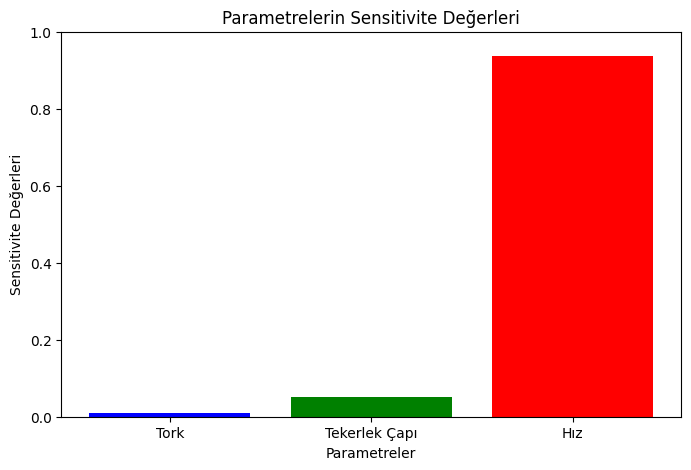

In [7]:
# Sensitivite Değerleri Çubuk Grafiği
sensitivite_degerleri = [0.0096636, 0.0522354, 0.93593063]
parametreler = ['Tork', 'Tekerlek Çapı', 'Hız']

plt.figure(figsize=(8, 5))
plt.bar(parametreler, sensitivite_degerleri, color=['blue', 'green', 'red'])
plt.xlabel('Parametreler')
plt.ylabel('Sensitivite Değerleri')
plt.title('Parametrelerin Sensitivite Değerleri')
plt.ylim(0, 1)
plt.show()


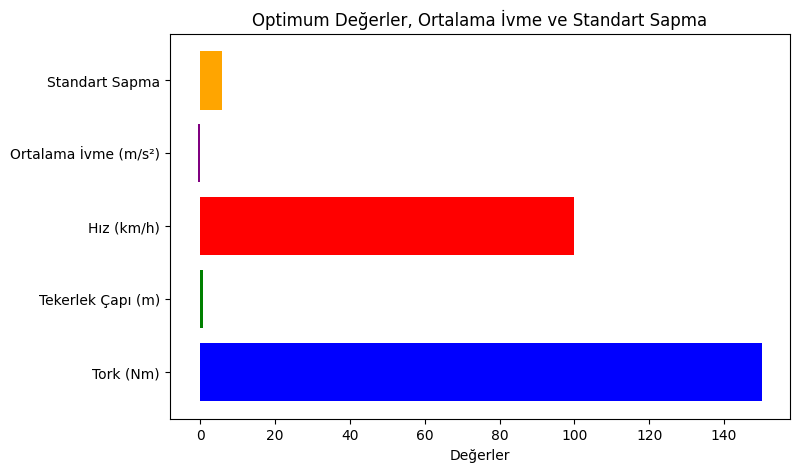

In [8]:
# Optimum Değerler, Ortalama İvme ve Standart Sapma Grafiği
optimum_degerler = ['Tork (Nm)', 'Tekerlek Çapı (m)', 'Hız (km/h)', 'Ortalama İvme (m/s²)', 'Standart Sapma']
degerler = [150.00, 0.70, 100.00, -0.64, 5.78]

plt.figure(figsize=(8, 5))
plt.barh(optimum_degerler, degerler, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Değerler')
plt.title('Optimum Değerler, Ortalama İvme ve Standart Sapma')
plt.show()


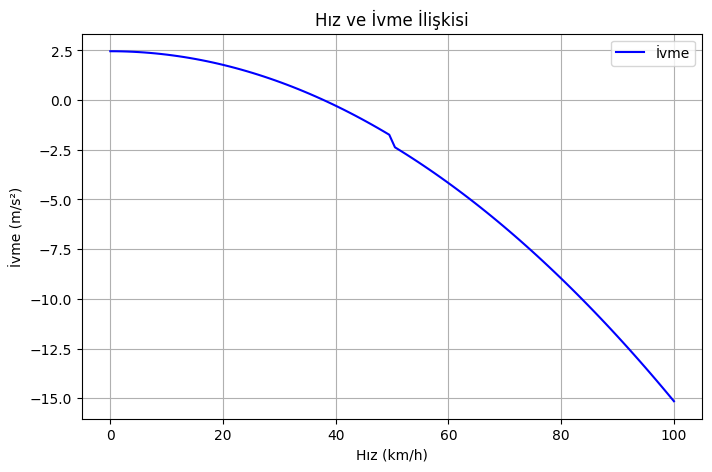

In [9]:
# Hız - İvme Grafiği
plt.figure(figsize=(8, 5))
plt.plot(hızlar, ivmeler, color='blue', label='İvme')
plt.xlabel('Hız (km/h)')
plt.ylabel('İvme (m/s²)')
plt.title('Hız ve İvme İlişkisi')
plt.grid(True)
plt.legend()
plt.show()


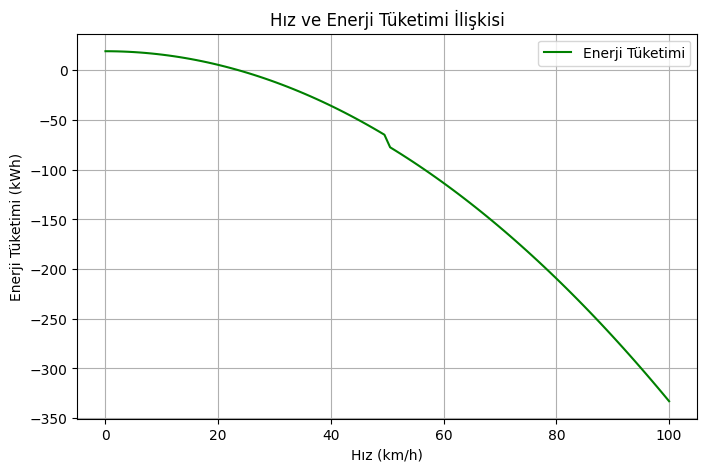

In [10]:
# Hız - Enerji Tüketimi Grafiği
plt.figure(figsize=(8, 5))
plt.plot(hızlar, enerji_tüketimi, color='green', label='Enerji Tüketimi')
plt.xlabel('Hız (km/h)')
plt.ylabel('Enerji Tüketimi (kWh)')
plt.title('Hız ve Enerji Tüketimi İlişkisi')
plt.grid(True)
plt.legend()
plt.show()
